In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [2]:
wine = datasets.load_wine()

In [3]:
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

In [4]:
df['target'] = wine.target

In [5]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [7]:
X = df[['alcohol','malic_acid']]
y = df['target']

In [8]:
train_X, test_X, train_y, test_y = train_test_split (X, y, test_size = 0.2, random_state= 42)


In [9]:
train_sub_X, val_X, train_sub_y, val_y = train_test_split(train_X, train_y, test_size=0.4, random_state=42)

In [24]:
#model = DecisionTreeClassifier(max_depth = 6, random_state = 42)
model = DecisionTreeClassifier(max_depth = 3, class_weight = {2:1})
model.fit(train_sub_X, train_sub_y)

DecisionTreeClassifier(class_weight={2: 1}, max_depth=3)

[Text(0.4583333333333333, 0.875, 'alcohol <= 12.755\ngini = 0.654\nsamples = 85\nvalue = [23.0, 36.0, 26.0]'),
 Text(0.25, 0.625, 'malic_acid <= 4.515\ngini = 0.272\nsamples = 37\nvalue = [0, 31, 6]'),
 Text(0.35416666666666663, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'alcohol <= 12.435\ngini = 0.202\nsamples = 35\nvalue = [0, 31, 4]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.071\nsamples = 27\nvalue = [0, 26, 1]'),
 Text(0.25, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [0, 5, 3]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.6666666666666666, 0.625, 'malic_acid <= 2.335\ngini = 0.586\nsamples = 48\nvalue = [23, 5, 20]'),
 Text(0.5625, 0.75, '  False'),
 Text(0.5, 0.375, 'malic_acid <= 1.54\ngini = 0.435\nsamples = 29\nvalue = [21, 5, 3]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.5\nsamples = 6\nvalue = [1, 4, 1]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.234\nsamples = 23\nvalue = [20, 1, 2]'),
 Text(0.8333333333333334, 

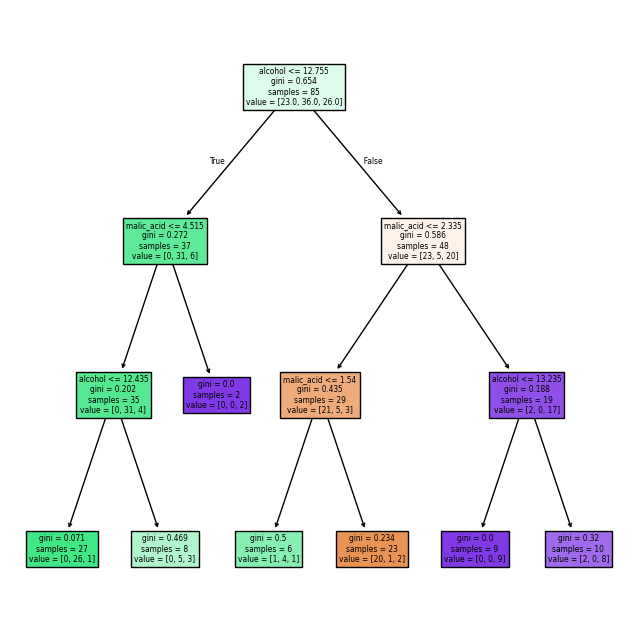

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize=(8,8))
plot_tree(model, filled= True, feature_names = ['alcohol', 'malic_acid'])

In [26]:
print("훈련 데이터셋 accuracy : {}".format(model.score(train_sub_X, train_sub_y)))
print("평가용 데이터 셋 accuracy : {}".format(model.score(val_X, val_y)))


훈련 데이터셋 accuracy : 0.8705882352941177
평가용 데이터 셋 accuracy : 0.7192982456140351


In [32]:
model_cv = DecisionTreeClassifier(max_depth = 2, random_state = 42, class_weight={2:1})
scores = cross_validate(model_cv, train_X, train_y)
print(scores)

{'fit_time': array([0.00199437, 0.00199294, 0.00099659, 0.00099707, 0.00099635]), 'score_time': array([0.00099611, 0.        , 0.00099635, 0.00099683, 0.00099659]), 'test_score': array([0.75862069, 0.68965517, 0.75      , 0.71428571, 0.82142857])}


In [ ]:
print(wine.DESCR)

In [15]:
y.value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

np.int64(178)

In [39]:
model_entropy = DecisionTreeClassifier(criterion = "entropy",max_depth = 2, random_state = 42, class_weight={2:1})
model_entropy.fit(train_sub_X, train_sub_y)


DecisionTreeClassifier(class_weight={2: 1}, criterion='entropy', max_depth=2,
                       random_state=42)

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [42]:
pred_y = model_entropy.predict(test_X)

In [44]:
cm = pd.crosstab(test_y, pred_y, rownames=['Actual'], colnames=['Predicted'])

In [45]:
cm

Predicted,0,1,2
Actual,,,
0,11,0,3
1,1,12,1
2,0,0,8


confusion matrix를 돌려서 분류가 실제로 제대로 되었는지,
잘못되었다면 어느 부분에서 문제가 있었는지 확인할 수 있다.


grid search를 통해 max_depth와 같은 하이퍼 파라미터를 찾을 수 있음.


아래는 의사 결정트리 13개 사용하는 것.

In [47]:
X = df[wine.feature_names]
y = df['target']

In [52]:
model = DecisionTreeClassifier(max_depth = 3, random_state = 42 )



In [50]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.4, random_state= 42) 

In [53]:
model.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=3, random_state=42)

0.9122807017543859


[Text(0.4444444444444444, 0.875, 'color_intensity <= 3.82\ngini = 0.654\nsamples = 85\nvalue = [23.0, 36.0, 26.0]'),
 Text(0.2222222222222222, 0.625, 'ash <= 3.0\ngini = 0.059\nsamples = 33\nvalue = [1, 32, 0]'),
 Text(0.3333333333333333, 0.75, 'True  '),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.6666666666666666, 0.625, 'flavanoids <= 1.71\ngini = 0.565\nsamples = 52\nvalue = [22, 4, 26]'),
 Text(0.5555555555555556, 0.75, '  False'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26]'),
 Text(0.7777777777777778, 0.375, 'alcohol <= 13.04\ngini = 0.26\nsamples = 26\nvalue = [22, 4, 0]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [1, 4, 0]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 21\nvalue = [21, 0, 0]')]

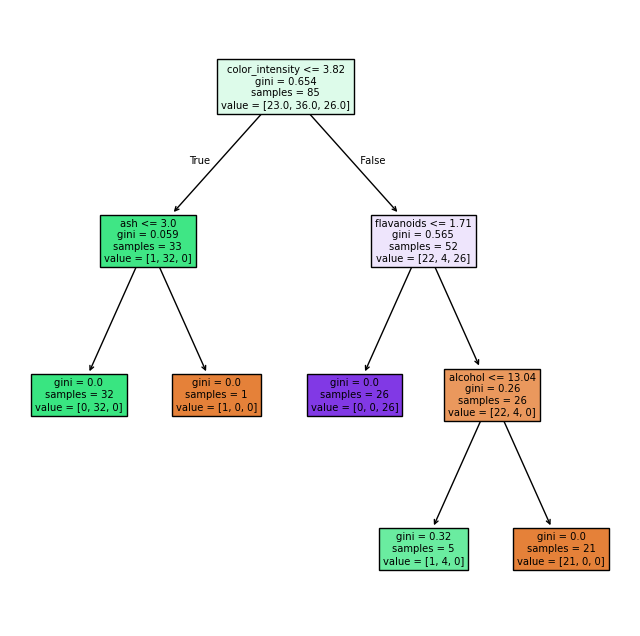

In [55]:
score = model.score(val_X, val_y)
print(score)

plt.figure(figsize=(8,8))
plot_tree(model, filled= True, feature_names=wine.feature_names)


아래는 랜덤 포레스트로 작성한 결과이다.


In [58]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth = 3, random_state=42)
rf_model.fit(train_X, train_y)


RandomForestClassifier(max_depth=3, random_state=42)

In [60]:
print("훈련 데이터셋 : {}".format(rf_model.score(train_X, train_y)))
print("평가 데이터셋 : {}".format(rf_model.score(val_X, val_y)))

훈련 데이터셋 : 1.0
평가 데이터셋 : 0.9473684210526315


In [61]:
print("최종 테스트 데이터셋 : {}".format(rf_model.score(test_X, test_y)))

최종 테스트 데이터셋 : 1.0


In [62]:
print("전체 데이터셋 : {}".format(rf_model.score(X, y)))

전체 데이터셋 : 0.9831460674157303
